In [1]:
import os
import string
import random
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#from sklearn.metrics import f1_score

In [29]:
import numpy as np

### Test LABELS for TOKENS in TEST Dataset against BERT Outputs

BERT Classifier has returned results for the tokens passed in 'test.tsv' file.  The returned values are probabilities, that need to be converted into equivalent class labels based on majority class.  Then, the class label should be compared against the actual label from the code above to extract the IO-Coding from the xml files.  This is a brute-force approach or a manual way of verifying the validity of the predictions


Read in results from BERT Predicitons to the above dataset
The above dataset is derived from IO-Coding applied as done on the training set. This is what should be based on the annotation process. Nowe, we have to read in the predictions from bert, which is a set of class probabilities across all 3 classes and we have to merget that with the above dataset for comparison and error analysis.

### Data File Names

* Test files with Labels and Filenames : /data_for_bert_augmented/test_files_with_labels/*_testfile.csv
* Bert label mapping : /data_for_bert_augmented/test_files_with_labels/*_labelmapping.csv
* BERT Augmented evaluation : /data_for_bert_augmented/BERT_augmented_run_results/bert_aug_data_output_data_*_output_results_test_results.txt


In [4]:
print(os.path.dirname(os.path.abspath('__file__')))

C:\Users\Kalyan\Documents\Anu\W266 - NLP\Final Project\lheart-disease-risk-prediction\Code


In [8]:
# read in the test files with labels

DI_test = pd.read_csv("data_for_bert_augmented/test_files_with_labels/diabetes_ind_testfile.csv")


In [9]:
DI_test.head(10)

,Unnamed: 0,sentence,label,file
0,0,Record date: 2080-02-18,Other,110-03.xml
1,1,SDU JAR Admission Note,Other,110-03.xml
2,2,Name: \t Yosef Villegas,Other,110-03.xml
3,3,MR:\t8249813,Other,110-03.xml
4,4,DOA: \t2/17/80,Other,110-03.xml
5,5,PCP: Gilbert Perez,Other,110-03.xml
6,6,Attending: YBARRA,Other,110-03.xml
7,7,CODE: FULL,Other,110-03.xml
8,8,HPI: 70 yo M with NIDDM admitted for cath aft...,mention,110-03.xml
9,9,Pt has had increasing CP and SOB on exertion f...,Other,110-03.xml


In [42]:
DI_test.rename( columns={'Unnamed: 0' :'sentenceId'}, inplace=True )

In [43]:
DI_test.head(10)

,sentenceId,sentence,label,file
0,0,Record date: 2080-02-18,Other,110-03.xml
1,1,SDU JAR Admission Note,Other,110-03.xml
2,2,Name: \t Yosef Villegas,Other,110-03.xml
3,3,MR:\t8249813,Other,110-03.xml
4,4,DOA: \t2/17/80,Other,110-03.xml
5,5,PCP: Gilbert Perez,Other,110-03.xml
6,6,Attending: YBARRA,Other,110-03.xml
7,7,CODE: FULL,Other,110-03.xml
8,8,HPI: 70 yo M with NIDDM admitted for cath aft...,mention,110-03.xml
9,9,Pt has had increasing CP and SOB on exertion f...,Other,110-03.xml


In [10]:
# read in the test results captured for BERT Hypertension model and specify columns as the actual file has no header
bert_aug_DI_results = pd.read_csv("data_for_bert_augmented/BERT_augmented_run_results/bert_aug_data_output_data_diabetes_ind_output_results_test_results.tsv", sep='\t',header=None)
 
bert_aug_DI_results.columns=["Class0", "Class1", "Class2", "Class3"]

In [12]:
bert_aug_DI_results.head()

,Class0,Class1,Class2,Class3
0,0.000006,0.999964,0.000006,0.000025
1,0.000150,0.990590,0.000242,0.009017
2,0.000019,0.999633,0.000017,0.000331
3,0.000025,0.999390,0.000022,0.000564
4,0.000020,0.999550,0.000019,0.000411


In [14]:
bert_aug_DI_results['predClass'] = bert_aug_DI_results.idxmax(axis=1)

In [15]:
bert_aug_DI_results.head()

,Class0,Class1,Class2,Class3,predClass
0,0.000006,0.999964,0.000006,0.000025,Class1
1,0.000150,0.990590,0.000242,0.009017,Class1
2,0.000019,0.999633,0.000017,0.000331,Class1
3,0.000025,0.999390,0.000022,0.000564,Class1
4,0.000020,0.999550,0.000019,0.000411,Class1


In [16]:
bert_aug_DI_results['predClass'].value_counts()

Class1    34626
Class3      852
Class0       70
Class2        8
Name: predClass, dtype: int64

In [17]:
def DI_set_labels(classlabel):
    if (classlabel=='Class0'):
        return 'A1C'
    elif (classlabel=='Class2'):
        return 'glucose'
    elif (classlabel=='Class3'):
        return 'mention'
    else:
        return 'Other'

In [18]:
bert_aug_DI_results['predLabel'] = bert_aug_DI_results['predClass'].apply(DI_set_labels)

bert_aug_DI_results.head(10)


,Class0,Class1,Class2,Class3,predClass,predLabel
0,0.000006,0.999964,0.000006,0.000025,Class1,Other
1,0.000150,0.990590,0.000242,0.009017,Class1,Other
2,0.000019,0.999633,0.000017,0.000331,Class1,Other
3,0.000025,0.999390,0.000022,0.000564,Class1,Other
4,0.000020,0.999550,0.000019,0.000411,Class1,Other
5,0.000007,0.999970,0.000007,0.000016,Class1,Other
6,0.000007,0.999971,0.000006,0.000016,Class1,Other
7,0.000007,0.999971,0.000006,0.000016,Class1,Other
8,0.000166,0.001673,0.000334,0.997826,Class3,mention
9,0.000007,0.999968,0.000007,0.000017,Class1,Other


In [19]:
# validating the counts by label
bert_aug_DI_results['predLabel'].value_counts()

Other      34626
mention      852
A1C           70
glucose        8
Name: predLabel, dtype: int64

In [45]:
DI_combined = pd.concat([DI_test, bert_aug_DI_results], axis=1)

In [46]:
DI_combined.head()

,sentenceId,sentence,label,file,Class0,Class1,Class2,Class3,predClass,predLabel
0,0,Record date: 2080-02-18,Other,110-03.xml,0.000006,0.999964,0.000006,0.000025,Class1,Other
1,1,SDU JAR Admission Note,Other,110-03.xml,0.000150,0.990590,0.000242,0.009017,Class1,Other
2,2,Name: \t Yosef Villegas,Other,110-03.xml,0.000019,0.999633,0.000017,0.000331,Class1,Other
3,3,MR:\t8249813,Other,110-03.xml,0.000025,0.999390,0.000022,0.000564,Class1,Other
4,4,DOA: \t2/17/80,Other,110-03.xml,0.000020,0.999550,0.000019,0.000411,Class1,Other


In [47]:
DI_combined[DI_combined['predLabel']!='Other']

,sentenceId,sentence,label,file,Class0,Class1,Class2,Class3,predClass,predLabel
8,8,HPI: 70 yo M with NIDDM admitted for cath aft...,mention,110-03.xml,0.000166,0.001673,0.000334,0.997826,Class3,mention
19,19,Diabetes mellitus type 2,mention,110-03.xml,0.000184,0.004939,0.000161,0.994716,Class3,mention
75,75,DM,mention,110-03.xml,0.000161,0.004520,0.000177,0.995142,Class3,mention
105,105,Diabetes mellitus type 2,mention,110-04.xml,0.000184,0.004939,0.000161,0.994716,Class3,mention
183,183,"dependent diabetes mellitus, hypertension.",mention,111-01.xml,0.000170,0.004269,0.000172,0.995389,Class3,mention
221,221,diabetes who presents with fever and chills.,mention,111-02.xml,0.000176,0.006391,0.000152,0.993280,Class3,mention
291,291,He is 61 years old with previous history of di...,mention,111-03.xml,0.000137,0.003409,0.000300,0.996154,Class3,mention
345,345,"PAST MEDICAL HISTORY: Hypertension, diabetes,...",mention,111-04.xml,0.000167,0.004440,0.000168,0.995224,Class3,mention
426,426,"In addition, CAD, diabetes,",mention,113-04.xml,0.000127,0.005786,0.000269,0.993818,Class3,mention
518,518,DM,mention,113-05.xml,0.000161,0.004520,0.000177,0.995142,Class3,mention


In [48]:
DI_test_labels = DI_combined['label']
DI_pred_labels = DI_combined['predLabel']

# print(type(DI_test_labels))

In [49]:
accuracy_score(DI_test_labels, DI_pred_labels)

0.9918157273034087

In [50]:
print(classification_report(DI_pred_labels, DI_test_labels))

              precision    recall  f1-score   support

         A1C       0.52      0.67      0.58        70
       Other       1.00      1.00      1.00     34626
     glucose       0.09      0.50      0.15         8
     mention       0.92      0.84      0.88       852

   micro avg       0.99      0.99      0.99     35556
   macro avg       0.63      0.75      0.65     35556
weighted avg       0.99      0.99      0.99     35556



In [51]:
print("Confusion Matrix \n", confusion_matrix(DI_test_labels, DI_pred_labels))

Confusion Matrix 
 [[   47    30     0    14]
 [   21 34497     4   120]
 [    0    39     4     1]
 [    2    60     0   717]]


In [52]:
unique_label = np.unique(DI_test_labels)
print(pd.DataFrame(confusion_matrix(DI_test_labels, DI_pred_labels, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label]))

              pred:A1C  pred:Other  pred:glucose  pred:mention
true:A1C            47          30             0            14
true:Other          21       34497             4           120
true:glucose         0          39             4             1
true:mention         2          60             0           717


### Analysis of Confused Pairs from the Confusion Matrix

In [53]:
DI_combined[(DI_combined['label'] =="Other") & (DI_combined['predLabel'] == "A1C")]

,sentenceId,sentence,label,file,Class0,Class1,Class2,Class3,predClass,predLabel
1161,1161,His pH is 7.42.,Other,116-05.xml,0.977040,0.018044,0.004280,0.000637,Class0,A1C
1597,1597,12/86 FBS 145 AND HGB A1C 4.57 = 66.,Other,131-01.xml,0.991385,0.008022,0.000297,0.000296,Class0,A1C
1767,1767,12/86 FBS 145 AND HGB A1C 4.57 = 66.,Other,131-02.xml,0.991385,0.008022,0.000297,0.000296,Class0,A1C
1789,1789,11/92 A1c 7.60 and glyburide added.,Other,131-02.xml,0.996920,0.002634,0.000213,0.000234,Class0,A1C
2539,2539,HBA1C 03/14/2091 6.50,Other,134-03.xml,0.999105,0.000521,0.000216,0.000158,Class0,A1C
3589,3589,Diabetes appears to be in better control accor...,Other,137-03.xml,0.995350,0.000996,0.000080,0.003574,Class0,A1C
7431,7431,"Last HgbA1c, per pt, was in 5-6.",Other,194-01.xml,0.997551,0.002002,0.000181,0.000266,Class0,A1C
7559,7559,"Per pt, the last HgbA1c was in 5-6 range.",Other,194-01.xml,0.998010,0.001500,0.000306,0.000184,Class0,A1C
11931,11931,Her last A1C was 5.9 in February.,Other,208-01.xml,0.948880,0.049537,0.000269,0.001315,Class0,A1C
12716,12716,Excellent reduction of hemoglobin A1c to 6%.,Other,210-02.xml,0.998229,0.001406,0.000180,0.000185,Class0,A1C


On checking the 21 confused pairs (Others, A1), the prediction label 'A1C' seems to be the correct label for the given sentence in two thirds of the sentences.  In the remaining one third of the confused sentences above, the prediction seems reasonable given that many of the sentences have the word 'HgbA1C'.  The algorithm has probably not seen enough data to learn that only levels above 6.5% are truly diabetic.

In [54]:
DI_combined[(DI_combined['label'] =="mention") & (DI_combined['predLabel'] == "Other")]

,sentenceId,sentence,label,file,Class0,Class1,Class2,Class3,predClass,predLabel
749,749,Taking Diabeta 10 b.i.d.,mention,115-01.xml,0.000331,0.961293,0.000339,0.038037,Class1,Other
772,772,Adjust Diabeta if necessary.,mention,115-01.xml,0.000058,0.999280,0.000052,0.000610,Class1,Other
1211,1211,"(2)\tDiabetes mellitus: FBS 126, 137, 149, 12...",mention,117-01.xml,0.000157,0.990955,0.000180,0.008707,Class1,Other
1227,1227,A/P:\t(1)\tDiabetes mellitus: Irregular contro...,mention,117-01.xml,0.000065,0.995776,0.000079,0.004080,Class1,Other
4688,4688,"HPI: \t69 yo F with PMH of DM, HTN, s/p MI one...",mention,165-04.xml,0.000049,0.997818,0.000054,0.002080,Class1,Other
4825,4825,Phenytoin - TDM PEND 5.0-20.0 mcg/...,mention,165-04.xml,0.000007,0.999965,0.000007,0.000021,Class1,Other
5225,5225,NIGHTFLOAT ADMIT NOTE,mention,167-04.xml,0.000125,0.990212,0.000252,0.009411,Class1,Other
5776,5776,-\tCV/DM diet,mention,168-03.xml,0.000031,0.999452,0.000024,0.000493,Class1,Other
5807,5807,"1.\tdiabetes retinopathy, neuropathy,nephropat...",mention,168-04.xml,0.000115,0.995721,0.000119,0.004045,Class1,Other
5969,5969,NEUROLOGY JUNIOR ADMIT/CONSULT NOTE,mention,169-03.xml,0.000205,0.972901,0.000414,0.026480,Class1,Other


Predictions seem more reasonable than the annotated label.

In [55]:
DI_combined[(DI_combined['label'] =="Other") & (DI_combined['predLabel'] == "mention")]

,sentenceId,sentence,label,file,Class0,Class1,Class2,Class3,predClass,predLabel
620,620,Mr. Slater is an 83 yo w/ h/o bull...,Other,114-04.xml,0.000518,0.003943,0.000163,0.995375,Class3,mention
693,693,: Mr. Slater is an 83 yo w/ h/o bullous pemphi...,Other,114-04.xml,0.000495,0.005697,0.000126,0.993682,Class3,mention
841,841,DM is under excellent control.,Other,115-04.xml,0.000171,0.004101,0.000168,0.995559,Class3,mention
964,964,"Endocr, see problem DM.",Other,115-04.xml,0.000164,0.011566,0.000198,0.988072,Class3,mention
1667,1667,"Two full brothers, one with DM, who is S/P THR...",Other,131-01.xml,0.000143,0.004298,0.000201,0.995358,Class3,mention
1842,1842,"Two full brothers, one with DM, who is S/P THR...",Other,131-02.xml,0.000143,0.004298,0.000201,0.995358,Class3,mention
1940,1940,Siblings: one brother with DM- s/p amputation ...,Other,131-03.xml,0.000158,0.004203,0.000187,0.995452,Class3,mention
2032,2032,DM: Long hx of DM- per pt.,Other,131-03.xml,0.000164,0.003271,0.000187,0.996378,Class3,mention
2090,2090,Another brother had diabetes and peripheral v...,Other,131-04.xml,0.000156,0.005299,0.000184,0.994361,Class3,mention
2184,2184,"Dr Mickey Kyle, DMD, MD",Other,131-04.xml,0.000203,0.013708,0.000158,0.985932,Class3,mention


Confusion matrix, without normalization
[[   47    30     0    14]
 [   21 34497     4   120]
 [    0    39     4     1]
 [    2    60     0   717]]


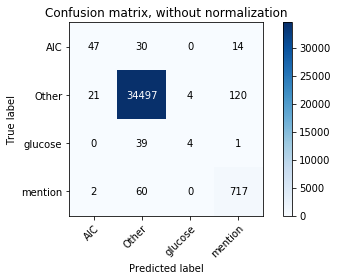

In [56]:
import numpy as np
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    return ax

plot_confusion_matrix(DI_test_labels, DI_pred_labels, ["AIC", "Other", "glucose", "mention"])
plt.show()

In [57]:
# read in the test files with labels

DT_test = pd.read_csv("data_for_bert_augmented/test_files_with_labels/diabetes_tim_testfile.csv")

In [59]:
DT_test.rename( columns={'Unnamed: 0' :'sentenceId'}, inplace=True )

In [60]:
DT_test.head(10)

,sentenceId,sentence,label,file
0,0,Record date: 2080-02-18,Other,110-03.xml
1,1,SDU JAR Admission Note,Other,110-03.xml
2,2,Name: \t Yosef Villegas,Other,110-03.xml
3,3,MR:\t8249813,Other,110-03.xml
4,4,DOA: \t2/17/80,Other,110-03.xml
5,5,PCP: Gilbert Perez,Other,110-03.xml
6,6,Attending: YBARRA,Other,110-03.xml
7,7,CODE: FULL,Other,110-03.xml
8,8,HPI: 70 yo M with NIDDM admitted for cath aft...,before DCT,110-03.xml
9,9,Pt has had increasing CP and SOB on exertion f...,Other,110-03.xml


In [64]:
# read in the test results captured for BERT Augmented Diabetes Time model and specify columns as the actual file has no header
bert_aug_DT_results = pd.read_csv("data_for_bert_augmented/bert_augmented_run_results/bert_aug_data_output_data_diabetes_time_output_results_test_results.tsv", sep='\t',header=None)
 
bert_aug_DT_results.columns=["Class0", "Class1", "Class2", "Class3"]

In [66]:
bert_aug_DT_results.head()

,Class0,Class1,Class2,Class3
0,0.999949,0.000013,0.000014,0.000023
1,0.990482,0.004019,0.001251,0.004248
2,0.999939,0.000019,0.000018,0.000025
3,0.999940,0.000018,0.000017,0.000025
4,0.999706,0.000073,0.000118,0.000103


In [67]:
bert_aug_DT_results['predClass'] = bert_aug_DT_results.idxmax(axis=1)

In [68]:
bert_aug_DT_results.head()

,Class0,Class1,Class2,Class3,predClass
0,0.999949,0.000013,0.000014,0.000023,Class0
1,0.990482,0.004019,0.001251,0.004248,Class0
2,0.999939,0.000019,0.000018,0.000025,Class0
3,0.999940,0.000018,0.000017,0.000025,Class0
4,0.999706,0.000073,0.000118,0.000103,Class0


In [69]:
bert_aug_DT_results['predClass'].value_counts()

Class0    34631
Class3      354
Class2      293
Class1      278
Name: predClass, dtype: int64

In [70]:
def DT_set_labels(classlabel):
    if (classlabel=='Class1'):
        return 'after DCT'
    elif (classlabel=='Class2'):
        return 'before DCT'
    elif (classlabel=='Class3'):
        return 'during DCT'
    else:
        return 'Other'

In [72]:
bert_aug_DT_results['predLabel'] = bert_aug_DT_results['predClass'].apply(DT_set_labels)

bert_aug_DT_results.head(10)


,Class0,Class1,Class2,Class3,predClass,predLabel
0,0.999949,0.000013,0.000014,0.000023,Class0,Other
1,0.990482,0.004019,0.001251,0.004248,Class0,Other
2,0.999939,0.000019,0.000018,0.000025,Class0,Other
3,0.999940,0.000018,0.000017,0.000025,Class0,Other
4,0.999706,0.000073,0.000118,0.000103,Class0,Other
5,0.999950,0.000014,0.000015,0.000021,Class0,Other
6,0.999951,0.000013,0.000014,0.000021,Class0,Other
7,0.999949,0.000014,0.000016,0.000022,Class0,Other
8,0.000549,0.002075,0.994244,0.003131,Class2,before DCT
9,0.999949,0.000013,0.000016,0.000023,Class0,Other


In [73]:
# validating the counts by label
bert_aug_DT_results['predLabel'].value_counts()

Other         34631
during DCT      354
before DCT      293
after DCT       278
Name: predLabel, dtype: int64

In [74]:
DT_combined = pd.concat([DT_test, bert_aug_DT_results], axis=1)

In [75]:
DT_combined.head()

,sentenceId,sentence,label,file,Class0,Class1,Class2,Class3,predClass,predLabel
0,0,Record date: 2080-02-18,Other,110-03.xml,0.999949,0.000013,0.000014,0.000023,Class0,Other
1,1,SDU JAR Admission Note,Other,110-03.xml,0.990482,0.004019,0.001251,0.004248,Class0,Other
2,2,Name: \t Yosef Villegas,Other,110-03.xml,0.999939,0.000019,0.000018,0.000025,Class0,Other
3,3,MR:\t8249813,Other,110-03.xml,0.999940,0.000018,0.000017,0.000025,Class0,Other
4,4,DOA: \t2/17/80,Other,110-03.xml,0.999706,0.000073,0.000118,0.000103,Class0,Other


In [76]:
DT_combined[DT_combined['predLabel']!='Other']

,sentenceId,sentence,label,file,Class0,Class1,Class2,Class3,predClass,predLabel
8,8,HPI: 70 yo M with NIDDM admitted for cath aft...,before DCT,110-03.xml,0.000549,0.002075,0.994244,0.003131,Class2,before DCT
19,19,Diabetes mellitus type 2,before DCT,110-03.xml,0.001331,0.004647,0.987954,0.006068,Class2,before DCT
75,75,DM,during DCT,110-03.xml,0.002612,0.946306,0.014267,0.036816,Class1,after DCT
105,105,Diabetes mellitus type 2,before DCT,110-04.xml,0.001331,0.004647,0.987954,0.006068,Class2,before DCT
183,183,"dependent diabetes mellitus, hypertension.",during DCT,111-01.xml,0.120927,0.407114,0.227309,0.244650,Class1,after DCT
221,221,diabetes who presents with fever and chills.,during DCT,111-02.xml,0.005970,0.959906,0.012588,0.021536,Class1,after DCT
291,291,He is 61 years old with previous history of di...,during DCT,111-03.xml,0.005058,0.008011,0.003066,0.983866,Class3,during DCT
345,345,"PAST MEDICAL HISTORY: Hypertension, diabetes,...",before DCT,111-04.xml,0.005018,0.010808,0.010810,0.973365,Class3,during DCT
426,426,"In addition, CAD, diabetes,",during DCT,113-04.xml,0.009998,0.038795,0.834735,0.116472,Class2,before DCT
518,518,DM,after DCT,113-05.xml,0.002612,0.946306,0.014267,0.036816,Class1,after DCT


In [77]:
DT_test_labels = DT_combined['label']
DT_pred_labels = DT_combined['predLabel']

#print(type(DT_test_labels))

In [78]:
accuracy_score(DT_test_labels, DT_pred_labels)

0.9831814602317471

In [79]:
print(classification_report(DT_pred_labels, DT_test_labels))

              precision    recall  f1-score   support

       Other       1.00      1.00      1.00     34631
   after DCT       0.50      0.36      0.42       278
  before DCT       0.55      0.40      0.47       293
  during DCT       0.48      0.67      0.56       354

   micro avg       0.98      0.98      0.98     35556
   macro avg       0.63      0.61      0.61     35556
weighted avg       0.98      0.98      0.98     35556



In [80]:
print("Confusion Matrix \n", confusion_matrix(DT_test_labels, DT_pred_labels))

Confusion Matrix 
 [[34503    40    45    54]
 [   15   101    46    42]
 [   61    13   118    22]
 [   52   124    84   236]]


In [81]:
unique_label = np.unique(DT_test_labels)
print(pd.DataFrame(confusion_matrix(DT_test_labels, DT_pred_labels, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label]))

                 pred:Other  pred:after DCT  pred:before DCT  pred:during DCT
true:Other            34503              40               45               54
true:after DCT           15             101               46               42
true:before DCT          61              13              118               22
true:during DCT          52             124               84              236


### Interpreting the predictions compared against actual test labels

As seen above, BERT predictions seem very accurate and it seems to predict only after it has seen the complete context.  Also, punctuation marks are not labeled as one of the relevant classes, although a human annotator has done based on the instructions provided as part of the annotation process.  